In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix 
from sklearn.tree import DecisionTreeClassifier , plot_tree
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
df.columns=['X'+ str(x) for x in range(len(df.columns)-1)]+['Y']

In [5]:
df.head(2)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,Y
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.778,0.00,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.0,0.94,...,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101,1028,1


In [6]:
X=df.drop('Y',axis=1)
Y=df.Y

In [7]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
x_train.shape,y_train.shape

((3220, 57), (3220,))

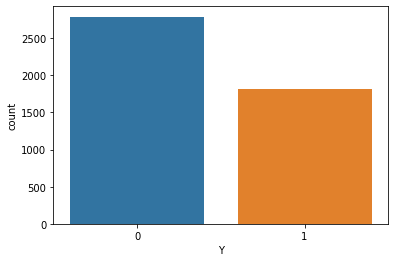

In [8]:
sns.countplot(Y);

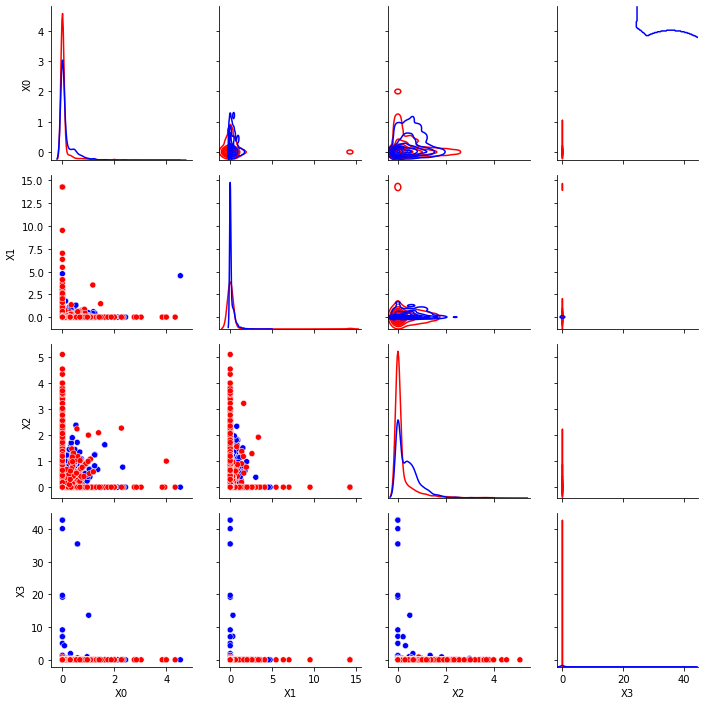

In [9]:
g=sns.PairGrid(df, vars=['X0','X1','X2','X3'],hue='Y',diag_sharey=False,palette=['red','blue'])
g.map_diag(sns.distplot,hist=False)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot);

# K - Nearest Neighbors 

In [10]:
knn=KNeighborsClassifier(n_neighbors=5).fit(x_train,y_train)

In [11]:
knn.score(x_train,y_train)

0.8677018633540373

In [12]:
knn=KNeighborsClassifier()
param=range(3,15,2)
grid=GridSearchCV(knn,{'n_neighbors':param})
best_knn=grid.fit(x_train,y_train).best_estimator_
best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

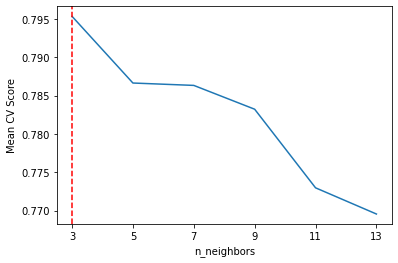

In [13]:
plt.plot(param,grid.cv_results_['mean_test_score'])
plt.xticks(param)
plt.ylabel('Mean CV Score')
plt.xlabel('n_neighbors')

plt.axvline(x=best_knn.n_neighbors,color='red',ls='--');

In [14]:
knn=KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)

In [15]:
knn.score(x_train,y_train)

0.8950310559006212

In [16]:
knn.score(x_test,y_test)

0.8110065170166546

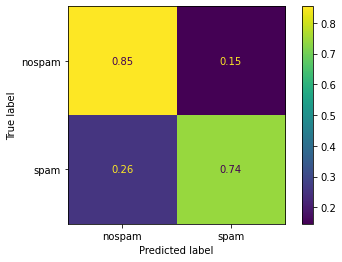

In [17]:
plot_confusion_matrix(best_knn,x_test,y_test,display_labels=['nospam','spam'],normalize='true');

In [18]:
knn.score(x_test,y_test)

0.8110065170166546

#Naive Bayes

In [20]:
nb=GaussianNB().fit(x_train,y_train)

In [23]:
nb.score(x_train,y_train),nb.score(x_test,y_test)

(0.8220496894409938, 0.8204199855177408)

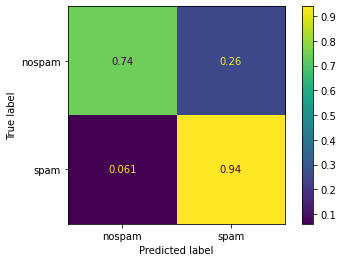

In [22]:
plot_confusion_matrix(nb,x_test,y_test,display_labels=['nospam','spam'],normalize='true');

# Decision Tree

In [26]:
dt=DecisionTreeClassifier(random_state=1)
param=range(6,45,2)
grid=GridSearchCV(dt,{'max_leaf_nodes':param,'criterion':['entropy','gini']})
grid.fit(x_train,y_train)
best_dt=grid.best_estimator_
best_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': 38,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1,
 'splitter': 'best'}

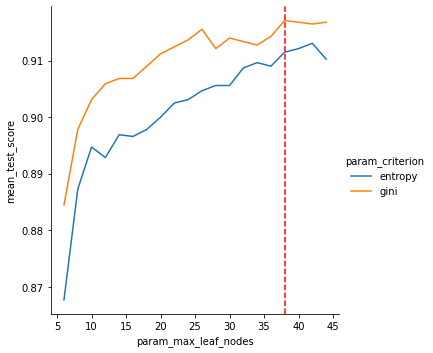

In [29]:
sns.relplot(data=pd.DataFrame.from_dict(grid.cv_results_,orient='columns'),
            kind='line',
            x='param_max_leaf_nodes',
            y='mean_test_score',
            hue='param_criterion')
plt.axvline(x=best_dt.max_leaf_nodes,color='red',ls='--');

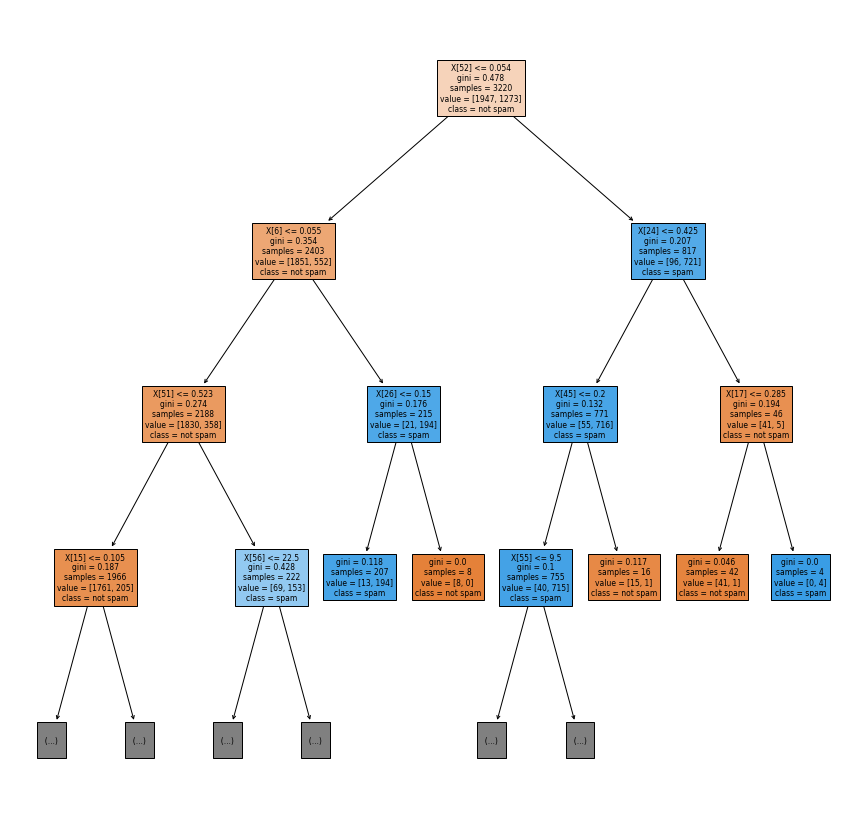

In [30]:
fig =plt.figure(figsize=(15,15))
t=plot_tree(best_dt,class_names=['not spam','spam'],max_depth=3,filled=True);

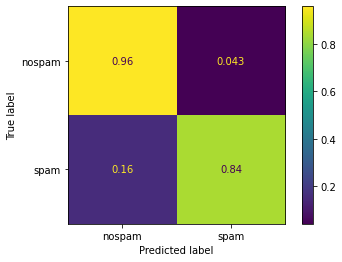

In [31]:
plot_confusion_matrix(best_dt,x_test,y_test,display_labels=['nospam','spam'],normalize='true');

In [33]:
best_dt.score(x_train,y_train)

0.9453416149068323